# Project: Investigate a Dataset - FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The FBI Gun Dataset is made up of two sources of data: the National Instant Criminal Background Check System (NICS) dataset & the U.S. census data. These two tables relate to each other by providing state data that overlaps in 2010 and 2016.

The National Instant Criminal Background Check System (NICS) dataset is from the system used to determine whether a buyer may purchase firearms or explosives. This information can be used as a stand-in estimate for gun sales in the United States. The dataset includes the number of inquiries made by state, month and type.

#### Columns
- month: Month and year when calls were made
- state: United States and territories
- Permit: Number calls per permit
- Permit_recheck: Number calls per permit recheck
- handgun: Number of calls regarding hand guns
- long_gun: Number of calls regarding long guns
- other: Number of calls regarding other firearms
- multiple: Number of calls regarding multiple firearms
- admin: Number of administrative calls
- prepawn_handgun: Number of calls regarding pre-pawn handguns
- prepawn_long_gun: Number of calls regarding pre-pawn long guns
- prepawn_other: : Number of calls regarding pre-pawn other firearms
- redemption_handgun: Number of calls regarding handgun redemptions
- redemption_long_gun: Number of calls regarding long gun redemptions
- redemption_other: Number of calls regarding other firearms redemptions
- returned_handgun: Number of calls regarding returned handguns
- returned_long_gun: Number of calls regarding returned long guns
- returned_other: Number of calls regarding returned other firearms
- rentals_handgun: Number of calls regarding handgun rentals
- rentals_long_gun: Number of calls regarding long gun rentals
- private_sale_handgun: Number of calls regarding private handgun sales
- private_sale_long_gun: Number of calls regarding private long gun sales
- private_sale_other: Number of calls regarding other firearms sales
- return_to_seller_handgun: Number of calls regarding handguns returned to seller
- return_to_seller_long_gun: Number of calls regarding long guns returned to seller
- return_to_seller_other: Number of calls regarding other firearms returned to seller
- totals: Total NICS calls made per month and state

The U.S. Census dataset contains several demographic variables organized by state and collection in census years. While most data points only reference a single year, some are provided for multiple years and overlap with the years included int he NICS dataset.

#### Columns
- Fact: Factors tracked and counted in the U.S. Census such as population, sex, age, housing, etc. The year each factor was counted is also included
- Fact Note: Reference column with secondary information about some factors
- States: There is a column for each state containing the demographic count for each factor tracked in the dataset


### Question(s) for Analysis
This analysis explores the relationship between the population size in the US and the number of gun sales that occurred between 2010 and 2016. It will first look at the rates at which the population and gun sales have changed over all between 2010 and 2016, and then looks a little closer to see which state experienced the most significant change in gun sales. 

In [118]:
#import statements for all of the packages that you
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [119]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling
In this section I reviewed various aspects of each table in preparation for cleaning.

### NICS Dataset Review
The NICS dataset contains several columns containing counts of inquiries made to the database for both states and territories (55). The date is available by month and year, but will need to be converted to datetime. Null values are recorded as 'zero' calls made. Therefore nulls may be turned into zeros (0) during cleaning.

In [120]:
#Loads in 'gun_data.csv' from NICS
df_nics = pd.read_csv('gun_data.csv')
df_nics.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
#review information regarding column names, number of columsn, datatypes, and nulls 
df_nics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [5]:
#checked for unique values. 
df_nics.nunique()

month                          227
state                           55
permit                        5390
permit_recheck                 168
handgun                       7381
long_gun                      8350
other                         1226
multiple                      1387
admin                          499
prepawn_handgun                 90
prepawn_long_gun               133
prepawn_other                   16
redemption_handgun            1893
redemption_long_gun           2370
redemption_other                47
returned_handgun               237
returned_long_gun              113
returned_other                  34
rentals_handgun                  9
rentals_long_gun                 8
private_sale_handgun           152
private_sale_long_gun          136
private_sale_other              43
return_to_seller_handgun        17
return_to_seller_long_gun       17
return_to_seller_other           5
totals                       10218
dtype: int64

In [6]:
#checked for null values
df_nics.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

### US Census Dateset Review
The US dataset contains several factors with the date information buried in the 'Fact' column. Only columns that reference 2010 & 2016 need to be kept. The Fact Note column does not impact this analysis being done here so can be safely ignored. All columns are strings in this dataset and will need to be converted to intergers and/or floats.

In [127]:
#Load in US Census Data
df_census = pd.read_csv('us_census_data.csv')
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [8]:
# Review of several aspects of the census data
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [9]:
#Review for null values
df_census.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     


### Data Cleaning
The US Census Data and NICS data overlap in the years 2010 and 2016 when several general demographic data points were recorded by the US Census including Population Estimates, percentage of each sex, and percetages for ages 0-5 years, 6-17 years, 18-64 years, and 65+ years. Since the remaining demographic data does not relate directly to 2010 & 2016, the remaining data rows will be dropped. The year will be extracted from the Fact categories, the rows/columns reversed so the Fact categories become the columns and the State Names and Year become the rows. Finally the percentages will be converted into integers for easier comparison.

For the NICS dataset, only the 2010 and 2016 data will be retained, Month column will be converted to datetime, and nulls converted to zero as they represent no queries for a particular month and category.

Both datasets will have duplicates removed. 

### Start of US Census Dataset Cleanup

#### Start of identifying and seperating out data that will be used in this analysis

In [128]:
#Check shape of census dateset
df_census.shape

(85, 52)

In [129]:
# US Census Data Cleanup
#Drop rows not related to 2010 and 2016 demographic data
df_census_trim = df_census.drop(df_census.index[range(12,85)])

In [130]:
#Confirm all desired rows are still present
df_census_trim

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",NaN,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",NaN,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",NaN,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",NaN,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


In [131]:
#Drop 'Fact Notes' column. This column is not helpful for analysis
df_census_trim.drop('Fact Note', axis=1, inplace=True)

In [132]:
#Check that 'Fact Notes' column has been dropped
df_census_trim.head(1)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"


In [133]:
#Assign Fact values as column heads
df_census_trim.set_index('Fact', inplace=True)

In [134]:
#Transpose columns and rows
df_census_v2 = df_census_trim.transpose()

In [135]:
df_census_v2.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010"
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,51.60%,51.50%
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,47.70%,48.00%
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,50.30%,50.30%
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,50.90%,50.90%
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,50.30%,50.30%


In [136]:
#dropped 2 columns that are duplicate information in the columns
df_census_v2.drop(df_census_v2.columns[[2, 3]], axis=1, inplace=True)

In [137]:
df_census_v2.head(1)

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010"
Alabama,"4,863,300","4,780,131",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,51.60%,51.50%


In [138]:
#saved changes to data
df_census_v2.to_csv('df_census_v2.csv', index=True)

In [139]:
df_census = pd.read_csv('df_census_v2.csv')
df_census.head()

,Unnamed: 0,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010"
0,Alabama,"4,863,300","4,780,131",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,51.60%,51.50%
1,Alaska,"741,894","710,249",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,47.70%,48.00%
2,Arizona,"6,931,071","6,392,301",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,50.30%,50.30%
3,Arkansas,"2,988,248","2,916,025",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,50.90%,50.90%
4,California,"39,250,017","37,254,522",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,50.30%,50.30%


In [140]:
#Updated column headers to make them more legible
df_census.columns = ['state','pop_2016','pop_2010','pop_under5_2016','pop_under5_2010','pop_under18_2016','pop_under18_2010','pop_over65_2016','pop_over65_2010','pop_female_2016','pop_female_2010']

In [141]:
#Checking column headers
df_census.head(1)

,state,pop_2016,pop_2010,pop_under5_2016,pop_under5_2010,pop_under18_2016,pop_under18_2010,pop_over65_2016,pop_over65_2010,pop_female_2016,pop_female_2010
0,Alabama,"4,863,300","4,780,131",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,51.60%,51.50%


#### Start of Datatype Cleanup

In [142]:
df_census.dtypes

state               object
pop_2016            object
pop_2010            object
pop_under5_2016     object
pop_under5_2010     object
pop_under18_2016    object
pop_under18_2010    object
pop_over65_2016     object
pop_over65_2010     object
pop_female_2016     object
pop_female_2010     object
dtype: object

In [143]:
#convert from string to int
df_census['pop_2016'] = df_census['pop_2016'].str.replace(',', '').astype(int)
df_census['pop_2010'] = df_census['pop_2010'].str.replace(',', '').astype(int)

In [144]:
#convert from string to float & calculate actual population numbers from percentages
df_census['pop_under5_2016'] = (df_census['pop_under5_2016'].str.replace('%', '').astype(float) / 100) * df_census['pop_2016']
df_census['pop_under5_2010'] = (df_census['pop_under5_2010'].str.replace('%', '').astype(float) / 100) * df_census['pop_2010']
df_census['pop_under18_2016'] = (df_census['pop_under18_2016'].str.replace('%', '').astype(float) / 100) * df_census['pop_2016']
df_census['pop_under18_2010'] = (df_census['pop_under18_2010'].str.replace('%', '').astype(float) / 100) * df_census['pop_2010']
df_census['pop_over65_2016'] = (df_census['pop_over65_2016'].str.replace('%', '').astype(float) / 100) * df_census['pop_2016']
df_census['pop_over65_2010'] = (df_census['pop_over65_2010'].str.replace('%', '').astype(float) / 100) * df_census['pop_2010']
df_census['pop_female_2016'] = (df_census['pop_female_2016'].str.replace('%', '').astype(float) / 100) * df_census['pop_2016']
df_census['pop_female_2010'] = (df_census['pop_female_2010'].str.replace('%', '').astype(float) / 100) * df_census['pop_2010']

In [145]:
#convert to int since you can't have a part of a person
df_census['pop_under5_2016'] = df_census['pop_under5_2016'].astype(int)
df_census['pop_under5_2010'] = df_census['pop_under5_2010'].astype(int)
df_census['pop_under18_2016'] = df_census['pop_under18_2016'].astype(int)
df_census['pop_under18_2010'] = df_census['pop_under18_2010'].astype(int)
df_census['pop_over65_2016'] = df_census['pop_over65_2016'].astype(int)
df_census['pop_over65_2010'] = df_census['pop_over65_2010'].astype(int)
df_census['pop_female_2016'] = df_census['pop_female_2016'].astype(int)
df_census['pop_female_2010'] = df_census['pop_female_2010'].astype(int)

In [146]:
df_census.dtypes

state               object
pop_2016             int32
pop_2010             int32
pop_under5_2016      int32
pop_under5_2010      int32
pop_under18_2016     int32
pop_under18_2010     int32
pop_over65_2016      int32
pop_over65_2010      int32
pop_female_2016      int32
pop_female_2010      int32
dtype: object

#### Checking for Nulls & Duplicates

In [147]:
#Check for nulls. No nulls need to be dropped
df_census.isnull().sum()

state               0
pop_2016            0
pop_2010            0
pop_under5_2016     0
pop_under5_2010     0
pop_under18_2016    0
pop_under18_2010    0
pop_over65_2016     0
pop_over65_2010     0
pop_female_2016     0
pop_female_2010     0
dtype: int64

In [148]:
#check for duplicates. No duplicates need to be dropped
sum(df_census.duplicated())

0

#### Creating a Year column to organize the data by years collected

In [149]:
#Seperate 2010 columns out so a year column may be added & remaining column names merged later
df_census_2010 = df_census.filter(['state','pop_2010','pop_under5_2010','pop_under18_2010','pop_over65_2010','pop_female_2010'],axis=1)
df_census_2010.columns = ['state','population','pop_under5','pop_under18','pop_over65','pop_female']    
df_census_2010.insert(1, 'year', 2010)
df_census_2010.head()

,state,year,population,pop_under5,pop_under18,pop_over65,pop_female
0,Alabama,2010,4780131,305928,1132891,659658,2461767
1,Alaska,2010,710249,53978,187505,54689,340919
2,Arizona,2010,6392301,453853,1630036,882137,3215327
3,Arkansas,2010,2916025,198289,711510,419907,1484256
4,California,2010,37254522,2533307,9313630,4247015,18739024


In [150]:
#Seperate 2016 columns out so a year column may be added & remaining column names merged later
df_census_2016 = df_census.filter(['state','pop_2016','pop_under5_2016','pop_under18_2016','pop_over65_2016','pop_female_2016'],axis=1)
df_census_2016.columns = ['state','population','pop_under5','pop_under18','pop_over65','pop_female']
df_census_2016.insert(1, 'year', 2016)
df_census_2016.head()

,state,year,population,pop_under5,pop_under18,pop_over65,pop_female
0,Alabama,2016,4863300,291798,1099105,782991,2509462
1,Alaska,2016,741894,54158,186957,77156,353883
2,Arizona,2016,6931071,436657,1628801,1171350,3486328
3,Arkansas,2016,2988248,191247,705226,487084,1521018
4,California,2016,39250017,2472751,9106003,5338002,19742758


In [151]:
#recombine 2010 & 2016 dataframes
df_census_combined = df_census_2010.append(df_census_2016)
df_census_combined

C:\Users\ampot\AppData\Local\Temp\ipykernel_7996\533819496.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_census_combined = df_census_2010.append(df_census_2016)


,state,year,population,pop_under5,pop_under18,pop_over65,pop_female
0,Alabama,2010,4780131,305928,1132891,659658,2461767
1,Alaska,2010,710249,53978,187505,54689,340919
2,Arizona,2010,6392301,453853,1630036,882137,3215327
3,Arkansas,2010,2916025,198289,711510,419907,1484256
4,California,2010,37254522,2533307,9313630,4247015,18739024
...,...,...,...,...,...,...,...
45,Virginia,2016,8411808,513120,1867421,1228123,4273198
46,Washington,2016,7288000,451856,1632511,1078624,3644000
47,West Virginia,2016,1831102,100710,375375,344247,924706
48,Wisconsin,2016,5778708,335165,1288651,930371,2906690


In [152]:
#save as cleaned version
df_census_combined.to_csv('df_census_cleaned.csv', index=False)

## Start of cleaning for NICS Gun Data

#### Check for Null & Duplicate Values

In [153]:
#check for null values
df_nics.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [154]:
#convert nulls to zeros
df_nics.fillna(0, inplace=True)

In [155]:
df_nics.isnull().sum()

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

In [156]:
#Check for duplicates. No duplicates need to be dropped
sum(df_nics.duplicated())

0

#### Correct datatypes and create a 'year' column

In [157]:
#Convert 'month' to 'year' with datetime dtype
df_nics['month'] = pd.to_datetime(df_nics['month'])
df_nics.insert(2, 'year', df_nics['month'].dt.year)
df_nics.drop(['month'], axis=1, inplace=True)

In [158]:
df_nics['year'].dtypes

dtype('int64')

In [159]:
df_nics.head(1)

,state,year,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,Alabama,2017,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019


#### Filter data for 2010 & 2016 data

In [160]:
#filtered out just 2010 data
df_nics_2010 = df_nics.query('year == 2010')
df_nics_2010

,state,year,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
4455,Alabama,2010,413.0,0.0,13978.0,24298.0,152.0,569,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43266
4456,Alaska,2010,0.0,0.0,2553.0,3950.0,93.0,146,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7036
4457,Arizona,2010,2082.0,0.0,9943.0,9814.0,219.0,431,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23942
4458,Arkansas,2010,2582.0,0.0,5816.0,12455.0,62.0,257,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23821
4459,California,2010,24901.0,0.0,24519.0,32100.0,0.0,0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5110,Virginia,2010,0.0,0.0,11513.0,10323.0,0.0,309,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22145
5111,Washington,2010,6640.0,0.0,9348.0,8287.0,471.0,386,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27184
5112,West Virginia,2010,26.0,0.0,3735.0,4860.0,61.0,342,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11693
5113,Wisconsin,2010,0.0,0.0,4382.0,7950.0,153.0,7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12734


In [161]:
#group by to sum the yearly numbers up by state
df_nics_2010 = df_nics_2010.groupby(['state','year']).sum()
df_nics_2010

,,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
state,year,,,,,,,,,,,,,,,,,,,,,
Alabama,2010,4621.0,0.0,116963.0,136519.0,1771.0,5465,19.0,115.0,183.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308607
Alaska,2010,0.0,0.0,25720.0,33177.0,825.0,1519,0.0,85.0,122.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65909
Arizona,2010,24751.0,0.0,89162.0,69067.0,2091.0,3768,0.0,57.0,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206050
Arkansas,2010,31305.0,0.0,49992.0,72206.0,636.0,3145,64.0,148.0,372.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,191448
California,2010,295252.0,0.0,245159.0,275458.0,0.0,0,530.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,816399
Colorado,2010,12928.0,0.0,130155.0,129642.0,0.0,28094,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300820
Connecticut,2010,90942.0,0.0,47545.0,40546.0,470.0,0,92.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,179595
Delaware,2010,0.0,0.0,9230.0,9466.0,207.0,337,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19240
District of Columbia,2010,2.0,0.0,308.0,11.0,0.0,0,28.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,349


In [162]:
#filtered out just 2016 data
df_nics_2016 = df_nics.query('year == 2016')
df_nics_2016

,state,year,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
495,Alabama,2016,26996.0,0.0,13733.0,17519.0,376.0,533,0.0,10.0,...,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,62014
496,Alaska,2016,254.0,0.0,4087.0,3698.0,243.0,191,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8786
497,Arizona,2016,8900.0,121.0,18024.0,13785.0,1180.0,703,0.0,10.0,...,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,44887
498,Arkansas,2016,3294.0,692.0,9192.0,13433.0,277.0,385,37.0,4.0,...,0.0,0.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,29926
499,California,2016,61808.0,0.0,63649.0,93224.0,77929.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,298161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,Virginia,2016,524.0,0.0,27033.0,15699.0,922.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44181
1151,Washington,2016,19688.0,0.0,20427.0,11355.0,2147.0,595,4.0,10.0,...,9.0,0.0,0.0,555.0,458.0,29.0,5.0,11.0,0.0,58050
1152,West Virginia,2016,3378.0,0.0,7419.0,5505.0,321.0,349,3.0,5.0,...,0.0,0.0,0.0,5.0,7.0,2.0,0.0,0.0,0.0,18985
1153,Wisconsin,2016,9496.0,0.0,17969.0,10756.0,937.0,42,0.0,0.0,...,1.0,0.0,0.0,6.0,5.0,0.0,0.0,1.0,0.0,39561


In [163]:
#group by to sum the yearly numbers up by state
df_nics_2016 = df_nics_2016.groupby(['state','year']).sum()
df_nics_2016

,,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
state,year,,,,,,,,,,,,,,,,,,,,,
Alabama,2016,291039.0,0.0,153123.0,121963.0,6104.0,6545,5.0,111.0,114.0,2.0,...,0.0,0.0,0.0,72.0,65.0,4.0,3.0,2.0,0.0,616947
Alaska,2016,3121.0,0.0,37491.0,36887.0,2889.0,2316,0.0,84.0,70.0,0.0,...,0.0,0.0,0.0,39.0,66.0,1.0,2.0,3.0,0.0,87647
Arizona,2016,87771.0,5109.0,166784.0,108988.0,13122.0,7908,0.0,74.0,60.0,3.0,...,1.0,0.0,0.0,76.0,56.0,11.0,11.0,11.0,1.0,416279
Arkansas,2016,55456.0,7036.0,80244.0,82120.0,3059.0,4400,143.0,77.0,116.0,3.0,...,0.0,0.0,0.0,72.0,64.0,6.0,7.0,4.0,1.0,266014
California,2016,1036981.0,0.0,560355.0,554550.0,211707.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2377167
Colorado,2016,85087.0,0.0,242502.0,180026.0,15890.0,14293,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,540514
Connecticut,2016,148949.0,0.0,122375.0,43813.0,2445.0,0,108.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,317692
Delaware,2016,8440.0,0.0,25574.0,21746.0,1268.0,1034,0.0,22.0,30.0,0.0,...,0.0,0.0,0.0,590.0,195.0,32.0,12.0,3.0,0.0,59430
District of Columbia,2016,144.0,0.0,675.0,48.0,0.0,8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,875


In [164]:
#recombined two datasets back into one
df_nics_2010_2016 = df_nics_2010.append(df_nics_2016)
df_nics_2010_2016

C:\Users\ampot\AppData\Local\Temp\ipykernel_7996\3933374480.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_nics_2010_2016 = df_nics_2010.append(df_nics_2016)


,,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
state,year,,,,,,,,,,,,,,,,,,,,,
Alabama,2010,4621.0,0.0,116963.0,136519.0,1771.0,5465,19.0,115.0,183.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308607
Alaska,2010,0.0,0.0,25720.0,33177.0,825.0,1519,0.0,85.0,122.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65909
Arizona,2010,24751.0,0.0,89162.0,69067.0,2091.0,3768,0.0,57.0,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206050
Arkansas,2010,31305.0,0.0,49992.0,72206.0,636.0,3145,64.0,148.0,372.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,191448
California,2010,295252.0,0.0,245159.0,275458.0,0.0,0,530.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,816399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virginia,2016,9817.0,0.0,295963.0,209975.0,12547.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,528369
Washington,2016,268274.0,652.0,214106.0,151029.0,23732.0,8028,39.0,78.0,74.0,16.0,...,78.0,0.0,0.0,6669.0,5472.0,382.0,69.0,104.0,14.0,713996
West Virginia,2016,26806.0,0.0,92124.0,81105.0,3643.0,5283,73.0,77.0,131.0,3.0,...,12.0,0.0,0.0,75.0,61.0,8.0,7.0,7.0,0.0,242350


In [165]:
#saved cleaned data to new csv
df_nics_2010_2016.to_csv('df_nics_cleaned.csv', index=True)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: How does the number of permit checks relate to the change in population?
As the charts show below, the number of gun purchases increased at a greater rate that the overall population from 2010 to 2016.  

In [166]:
#Load in both datasets
df_census = pd.read_csv('df_census_cleaned.csv')
df_nics = pd.read_csv('df_nics_cleaned.csv')

In [167]:
#view change in overall population between 2010 & 2016 by state
total_pop = df_census.groupby('year').sum()
total_pop

,population,pop_under5,pop_under18,pop_over65,pop_female
year,,,,,
2010,308156339,15458104,56690696,29697555,117947063
2016,322446343,15219536,56441276,36632884,123875207


In [168]:
#view change in gun permit requests between 2010 & 2016
total_permits = df_nics.groupby('year').sum()
total_permits

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
year,,,,,,,,,,,,,,,,,,,,,
2010,4884307.0,0.0,3678001.0,4842184.0,52761.0,180609,6751.0,3128.0,5175.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14320489
2016,11134651.0,519265.0,8085498.0,5988511.0,586137.0,257723,3366.0,2623.0,2567.0,161.0,...,791.0,16.0,21.0,14561.0,11042.0,1038.0,362.0,416.0,71.0,27425512


Below we can see the population increased by 14,290,004 people while gun sales increased by 13,105,023.

In [169]:
#actual increase in population
diff_pop = total_pop['population'].iloc[1] - total_pop['population'].iloc[0]
print('The US population increased by {} people.'.format(diff_pop))

The US population increased by 14290004 people.


In [170]:
#actual increase in gun sales
diff_nics = total_permits['totals'].iloc[1] - total_permits['totals'].iloc[0]
print('There were {} more gun sales in 2016 than 2010.'.format(diff_nics))

There were 13105023 more gun sales in 2016 than 2010.


In [171]:
#function to display bar chart with labels and title
def line_plot_by(x, xlabel, ylabel,title):
    ''' A function to draw a bar chart 
        x- plotted value
        xlabel- x axis label
        ylabel- y axis label'''
    total_pop[x].plot(kind='line')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
plt.show()

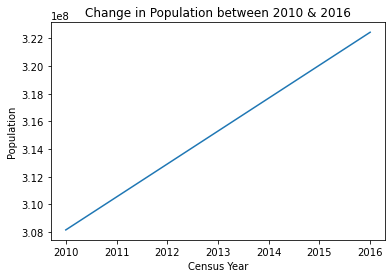

In [172]:
#Display Change in Population between 2010 & 2016 bar chart
line_plot_by('population','Census Year','Population','Change in Population between 2010 & 2016')

When plotted on bar charts however you can see that the rate of increase in gun sales is much higher than the rate of population increase. The 2016 total gun sales is nearly twice as large as the 2010 column.

In [173]:
#Display Change in Gun Sales between 2010 & 2016 bar chart
line_plot_by('totals','Census Year','Gun Sales','Change in Gun Sales between 2010 & 2016')

KeyError: 'totals'

We can also see the difference in rate increase by calculating the percentage increase for Population & Gun Sales.

In [84]:
#Calculate percentage increase for population
pop_percent_increase = (diff_pop / total_pop['population'].iloc[0]) * 100
print('Percent Population Increase: {}%'.format(pop_percent_increase))

Percent Population Increase: 4.637257843331271%


In [85]:
#Calculate percentage increase for gun sales
permit_percent_increase = (diff_nics / total_permits['totals'].iloc[0]) * 100
print('Percent Gun Sales Increase: {}%'.format(permit_percent_increase))

Percent Gun Sales Increase: 91.5123987735335%


### Research Question 2: Which States had the greatest increase in gun sales?

In order to review this question, data from each year must be split into seperate columns

In [86]:
#In order to review this question, data from each year must be split into seperate columns
df_nics_2010 = df_nics.query('year == 2010')[['state','year','totals']]
df_nics_2016 = df_nics.query('year == 2016')[['state','year','totals']]

In [87]:
df_nics_2010.rename(columns={'totals': 'totals_2010'}, inplace=True)
df_nics_2016.rename(columns={'totals': 'totals_2016'}, inplace=True)

In [88]:
df_nics_combine = df_nics_2016.append(df_nics_2010).reset_index().drop(['index'], axis=1)
df_nics_combine

C:\Users\ampot\AppData\Local\Temp\ipykernel_7996\944814750.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_nics_combine = df_nics_2016.append(df_nics_2010).reset_index().drop(['index'], axis=1)


,state,year,totals_2016,totals_2010
0,Alabama,2016,616947.0,NaN
1,Alaska,2016,87647.0,NaN
2,Arizona,2016,416279.0,NaN
3,Arkansas,2016,266014.0,NaN
4,California,2016,2377167.0,NaN
...,...,...,...,...
105,Virginia,2010,NaN,320783.0
106,Washington,2010,NaN,335342.0
107,West Virginia,2010,NaN,159550.0
108,Wisconsin,2010,NaN,194797.0


In [89]:
df_nics_combine['totals_2010'] = df_nics_combine['totals_2010'].shift(periods=-55)


In [90]:
df_nics_combine.drop(df_nics_combine.index[55:110], axis=0, inplace=True)
df_nics_combine

,state,year,totals_2016,totals_2010
0,Alabama,2016,616947.0,308607.0
1,Alaska,2016,87647.0,65909.0
2,Arizona,2016,416279.0,206050.0
3,Arkansas,2016,266014.0,191448.0
4,California,2016,2377167.0,816399.0
5,Colorado,2016,540514.0,300820.0
6,Connecticut,2016,317692.0,179595.0
7,Delaware,2016,59430.0,19240.0
8,District of Columbia,2016,875.0,349.0
9,Florida,2016,1435340.0,559347.0


Once seperated we can calculate the percent increase in gun sales by state.

In [91]:
df_nics_combine.eval('totals_diff = totals_2016 - totals_2010', inplace=True)
df_nics_combine.head(1)

,state,year,totals_2016,totals_2010,totals_diff
0,Alabama,2016,616947.0,308607.0,308340.0


In [92]:
df_nics_combine.eval('percent_increase = (totals_diff / totals_2010) * 100', inplace=True)
df_nics_combine.head(1)

,state,year,totals_2016,totals_2010,totals_diff,percent_increase
0,Alabama,2016,616947.0,308607.0,308340.0,99.913482


As can clearly be seen on the chart below, the state with the largest percent increase in gun sales was Indiana.

Text(0.5, 1.0, 'Percent Change in Gun Sales by State')

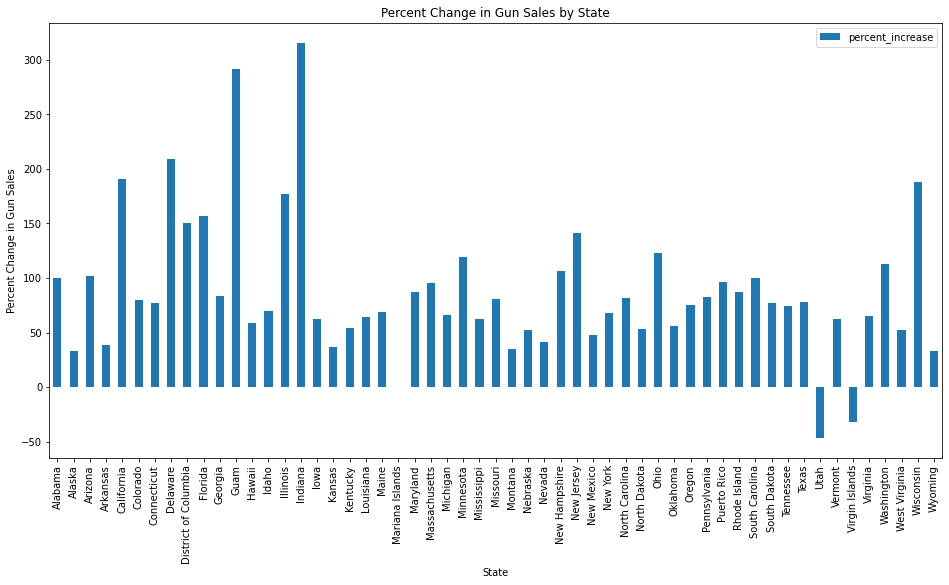

In [95]:
#Plotting percentage increase/decrease in gun sales by state
df_nics_combine.plot(x='state',y='percent_increase',kind='bar', figsize=(16,8))
plt.ylabel('Percent Change in Gun Sales')
plt.xlabel('State')
plt.title('Percent Change in Gun Sales by State')

<a id='conclusions'></a>
## Conclusions

This analysis shows that the rate of gun sales has gone up much faster tahn the rate of population growth within the United States. The state with the largest increase is Indiana while Utah saw a decrease in gun sales between 2010 and 2016. This information may be a helpful jumping off point for additional investigation into why the rates are increasing seperately.

This analysis is limited in that we do not know why gun rates have increased more or less in a particular state. In addition, additional census information would be necessary to understand if there is a trend in these rates of increase.


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [95]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1